<a href="https://colab.research.google.com/github/marelycarcamo/Challenge1-Tiendas/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Challenge 1. Tiendas.


### Importación y versión de librerías

## Importación de datos y creación de los dataframe base.

In [158]:
import pandas as pd
pd.__version__

import seaborn as sns
sns.__version__

import matplotlib as plt
plt.__version__  # type: ignore

from unidecode import unidecode
import unicodedata

#version de python
import sys
sys.version

print(f'Pandas: {pd.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Matplotlib: {plt.__version__}') # type:ignore
print(f'Python: {sys.version}')

Pandas: 2.2.2
Seaborn: 0.13.2
Matplotlib: 3.10.0
Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [172]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


Iterar sobre los archivos csv para visualizar las columnas.

In [173]:
for df in [tienda1, tienda2, tienda3, tienda4]:
    print(df.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [174]:
# Creamos una columna 'Tienda', para el identificador de tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenamos las tiendas en un único dataframe.
df_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
df_tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,Tienda 1
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,Tienda 1
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,Tienda 1
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,Tienda 1
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,Tienda 1


In [175]:
df_tiendas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [176]:
# Eliminando los acentos y reemplazando nombres de columnas.

def limpiar_columnas(df):
    # Convertir las columnas a pandas.Index después de procesarlas
    df.columns = pd.Index([unidecode(col).lower().replace(" ", "_") for col in df.columns])
    df.columns = df.columns.str.replace('_de_', '_', regex=False)\
                           .str.replace('_del_', '_', regex=False)\
                           .str.replace('lat', 'latitud', regex=False)\
                           .str.replace('lon', 'longitud', regex=False)
    return

limpiar_columnas(df_tiendas)
df_tiendas.columns

Index(['producto', 'categoria_producto', 'precio', 'costo_envio',
       'fecha_compra', 'vendedor', 'lugar_compra', 'calificacion',
       'metodo_pago', 'cantidad_cuotas', 'latitud', 'longitud', 'tienda'],
      dtype='object')

In [183]:
# Normalización para reducir inconsistencias. Eliminamos espacios en blanco y estardarizar uso de mayúsculas y minúsculas


textos_lower = ['producto', 'categoria_producto','metodo_pago','tienda']
textos_title = ['vendedor', 'lugar_compra']


def normalizar_texto(df, columnas_lower=[], columnas_title=[]):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.strip()
    for col in columnas_lower:
        df[col] = df[col].str.lower()
    for col in columnas_title:
        df[col] = df[col].str.title()
    return df



df_tiendas = normalizar_texto(df_tiendas, columnas_lower=textos_lower, columnas_title=textos_title)


df_tiendas.head()

,producto,categoria_producto,precio,costo_envio,fecha_compra,vendedor,lugar_compra,calificacion,metodo_pago,cantidad_cuotas,latitud,longitud,tienda
0,asistente virtual,electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,tarjeta de crédito,8,4.61,-74.08,tienda 1
1,mesa de comedor,muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,tarjeta de crédito,4,6.25,-75.56,tienda 1
2,juego de mesa,juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,tarjeta de crédito,1,10.40,-75.51,tienda 1
3,microondas,electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,nequi,1,3.44,-76.52,tienda 1
4,silla de oficina,muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,nequi,1,6.25,-75.56,tienda 1


In [171]:
# Especificando tipo de datos para datos object
df_tiendas['fecha_compra'] = pd.to_datetime(df_tiendas['fecha_compra'],dayfirst=True)
categoricas = ['producto', 'categoria_producto', 'vendedor', 'lugar_compra', 'metodo_pago','tienda']


for col in categoricas:
    df_tiendas[col] = df_tiendas[col].astype('category')

df_tiendas.dtypes


,0
producto,category
categoria_producto,category
precio,float64
costo_envio,float64
fecha_compra,datetime64[ns]
vendedor,category
lugar_compra,category
calificacion,int64
metodo_pago,category
cantidad_cuotas,int64


In [37]:
#Verificar si hay duplicados
df_tiendas.duplicated().sum() # np.int64(0) En este caso no hay duplicados

np.int64(0)

In [38]:
# Verificar si hay valores nulos
df_tiendas.isnull().sum()  # No hay valores nulos

,0
producto,0
categoria_producto,0
precio,0
costo_envio,0
fecha_compra,0
vendedor,0
lugar_compra,0
calificacion,0
metodo_pago,0
cantidad_cuotas,0


In [39]:
# Mostrar las categoría

df_tiendas['categoria_producto'].value_counts()
df_tiendas.groupby(['categoria_producto','producto'],observed=True).size()

df_tiendas


,producto,categoria_producto,precio,costo_envio,fecha_compra,vendedor,lugar_compra,calificacion,metodo_pago,cantidad_cuotas,latitud,longitud,tienda
0,asistente virtual,electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,mesa de comedor,muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,juego de mesa,juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,microondas,electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,nequi,1,3.43722,-76.52250,Tienda 1
4,silla de oficina,muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,nequi,1,6.25184,-75.56359,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,mesa de comedor,muebles,227700.0,12600.0,2020-02-12,Camila Rivera,Medellín,5,tarjeta de crédito,1,6.25184,-75.56359,Tienda 4
9431,silla de oficina,muebles,342000.0,18600.0,2022-05-17,Felipe Santos,Bucaramanga,5,tarjeta de crédito,3,7.12539,-73.11980,Tienda 4
9432,vaso térmico,deportes y diversión,36700.0,2400.0,2022-05-03,Camila Rivera,Bogotá,5,tarjeta de crédito,1,4.60971,-74.08175,Tienda 4
9433,set de ollas,artículos para el hogar,151800.0,8300.0,2020-06-15,Blanca Ramirez,Cali,5,tarjeta de crédito,1,3.43722,-76.52250,Tienda 4


In [40]:
# Mostrar los productos
df_tiendas['vendedor'].value_counts()

,count
vendedor,
Izabela De León,744
Felipe Santos,701
Juan Fernandez,694
Ángel Rodriguez,684
Blanca Ramirez,679
Maria Alfonso,679
Juliana Costa,677
Lucas Olivera,674
Camila Rivera,667


In [41]:
# Mostrar los productos
df_tiendas['metodo_pago'].value_counts()

,count
metodo_pago,
tarjeta de crédito,6898
nequi,1900
cupón,504
tarjeta de débito,133


#1. Análisis de facturación



In [54]:
# Cambiamos la configuración de Panda para tener los resultados con formato estándar.
pd.set_option('display.float_format', '{:,.2f}'.format)


# En este primer análisis, calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.
# Suponemos que ya hiciste esto:
df_facturacion = df_tiendas.groupby('tienda', observed=True)['precio'].sum().reset_index()
df_facturacion

,tienda,precio
0,Tienda 1,"1,150,880,400.00"
1,Tienda 2,"1,116,343,500.00"
2,Tienda 3,"1,098,019,600.00"
3,Tienda 4,"1,038,375,700.00"


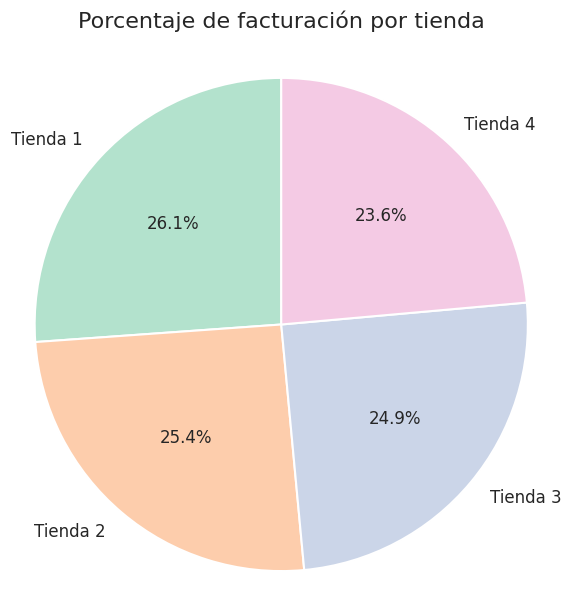

In [57]:
# Datos
labels = df_facturacion['tienda']
sizes = df_facturacion['precio']

# Colores suaves (opcional)
colores = plt.cm.Pastel2.colors

# Gráfico circular
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',   # porcentaje con 1 decimal
    startangle=90,
    colors=colores,
    textprops={'fontsize': 12}
)

# Título y formato
plt.title('Porcentaje de facturación por tienda', fontsize=16, pad=20)
plt.axis('equal')  # Mantiene forma circular

plt.show()



# 2. Ventas por categoría

In [ ]:
# Calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

df_categorias = df_tiendas.groupby(['tienda', 'categoria_del_producto'],observed=True)['categoria_del_producto'].count()
df_categorias = df_categorias.unstack()


df_categorias



categoria_del_producto,artículos para el hogar,deportes y diversión,electrodomésticos,electrónicos,instrumentos musicales,juguetes,libros,muebles
tienda,,,,,,,,
Tienda 1,171,284,312,448,182,324,173,465
Tienda 2,181,275,305,422,224,313,197,442
Tienda 3,177,277,278,451,177,315,185,499
Tienda 4,201,277,254,451,170,338,187,480


In [ ]:
# Con el dataframe df_categorias, obtener: tienda, la categoría con la máxima cantidad y el monto máximo asociado
df_categorias_max = df_categorias.idxmax(axis=1)
df_categorias_max = df_categorias_max.reset_index()
df_categorias_max


,tienda,0
0,Tienda 1,muebles
1,Tienda 2,muebles
2,Tienda 3,muebles
3,Tienda 4,muebles


# 3. Calificación promedio de la tienda


In [ ]:
#calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

df_calificacion = df_tiendas.groupby('tienda',observed=True)['calificacion'].mean()
df_calificacion = df_calificacion.reset_index()
df_calificacion

,tienda,calificacion
0,Tienda 1,3.98
1,Tienda 2,4.04
2,Tienda 3,4.05
3,Tienda 4,4.00


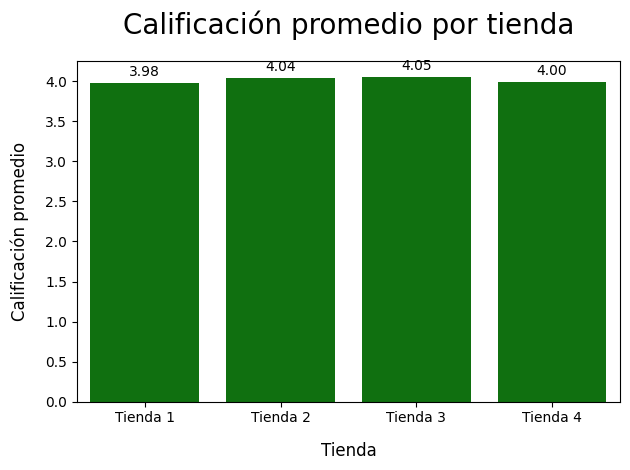

In [ ]:
# Gráfico de barras
ax = sns.barplot(data=df_calificacion, x='tienda', y='calificacion',color='green')
# Agregar etiquetas con 1 decimal
for i, row in df_calificacion.iterrows():
    ax.text(i, row['calificacion'] + 0.05, f"{row['calificacion']:.2f}", ha='center', va='bottom')

# Títulos y estilos
plt.title('Calificación promedio por tienda', fontsize=20, pad=20)
plt.ylabel('Calificación promedio',fontsize=12,labelpad=12)
plt.xlabel('Tienda',fontsize=12,labelpad=12)
plt.tight_layout()

plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# Identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.
df_productos = df_tiendas.groupby('tienda',observed=True)['producto'].value_counts().reset_index(name='cantidad')
df_productos


,tienda,producto,cantidad
0,Tienda 1,armario,60
1,Tienda 1,microondas,60
2,Tienda 1,tv led uhd 4k,60
3,Tienda 1,secadora de ropa,58
4,Tienda 1,bloques de construcción,56
...,...,...,...
199,Tienda 4,lavadora de ropa,38
200,Tienda 4,refrigerador,38
201,Tienda 4,guitarra acústica,37
202,Tienda 4,armario,34


In [ ]:
# Obtener el producto más vendido por tienda
top_productos = df_productos.sort_values(['tienda', 'cantidad'], ascending=[True, False]).drop_duplicates('tienda', keep='first')
tpp = top_productos.rename(columns={'Producto': 'Producto más vendido'})
tpp

,tienda,producto,cantidad
0,Tienda 1,armario,60
51,Tienda 2,iniciando en programación,65
102,Tienda 3,kit de bancas,57
153,Tienda 4,cama box,62


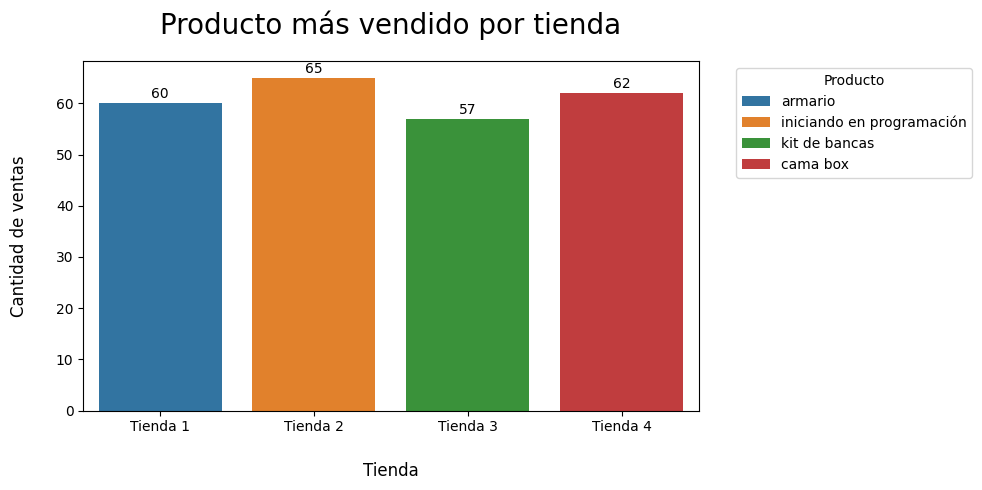

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=tpp, x='tienda', y='cantidad', hue='producto')
plt.title('Producto más vendido por tienda',fontsize=20, pad=20)
plt.ylabel('Cantidad de ventas',fontsize=12, labelpad=20)
plt.xlabel('Tienda',fontsize=12, labelpad=20)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
# Mostrar valores encima de cada barra
for i, valor in enumerate(tpp['cantidad']):
    plt.text(i, valor + 1, str(int(valor)), ha='center', fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
# Obtener el producto menos vendido por tienda
low_productos = df_productos.sort_values(['tienda', 'cantidad'], ascending=[True, True]).drop_duplicates('tienda', keep='first')
lpp = low_productos.rename(columns={'Producto': 'Producto menos vendido'})
lpp

,tienda,producto,cantidad
49,Tienda 1,auriculares con micrófono,33
101,Tienda 2,juego de mesa,32
152,Tienda 3,bloques de construcción,35
203,Tienda 4,guitarra eléctrica,33


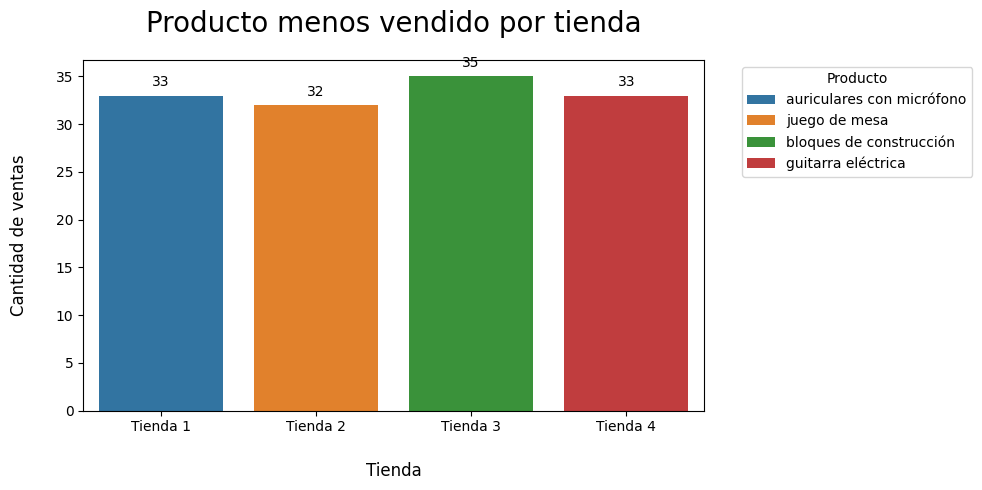

In [ ]:
#Gráfico de barras, x=tiendas, y=cantidad productos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=lpp, x='tienda', y='cantidad', hue='producto')
plt.title('Producto menos vendido por tienda',fontsize=20, pad=20)
plt.ylabel('Cantidad de ventas',fontsize=12, labelpad=20)
plt.xlabel('Tienda',fontsize=12,labelpad=20)
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
# Mostrar valores encima de cada barra
for i, valor in enumerate(lpp['cantidad']):
    plt.text(i, valor + 1, str(int(valor)), ha='center', fontsize=10)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [ ]:
df_envio_promedio = df_tiendas.groupby('tienda',observed=True)['costo_de_envio'].mean()
df_envio_promedio = df_envio_promedio.reset_index()
df_envio_promedio

,tienda,costo_de_envio
0,Tienda 1,"26,018.61"
1,Tienda 2,"25,216.24"
2,Tienda 3,"24,805.68"
3,Tienda 4,"23,459.46"


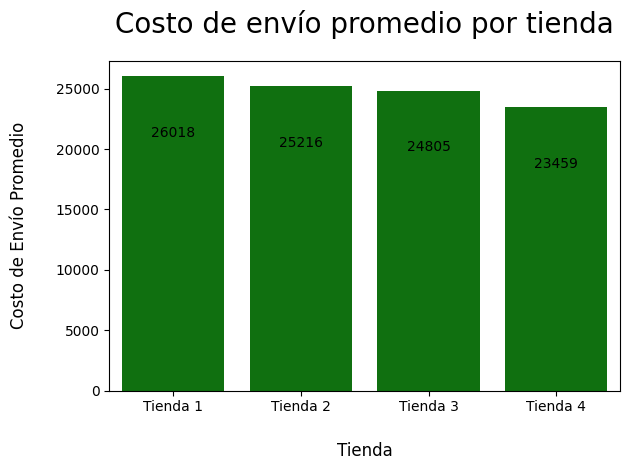

In [ ]:
sns.barplot(data=df_envio_promedio, x='tienda', y='costo_de_envio',color= 'green')
plt.title('Costo de envío promedio por tienda',fontsize=20, pad=20)
plt.xlabel('Tienda')
plt.xlabel('Tienda',fontsize=12,labelpad=20)
plt.ylabel('Costo de Envío Promedio',fontsize=12, labelpad=20)

# Mostrar valores encima de cada barra
for i, valor in enumerate(df_envio_promedio['costo_de_envio']):
    plt.text(i, valor -5000 , str(int(valor)), ha='center', fontsize=10)

# Ajustar márgenes
plt.tight_layout()
plt.show()